# Image Grounded Conversations

References:
- [data (from Microsoft servers)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=2ahUKEwjnjYOt_qjkAhWLCOwKHRyvCxkQFjACegQIARAB&url=https%3A%2F%2Fwww.microsoft.com%2Fen-us%2Fdownload%2Fdetails.aspx%3Fid%3D55324&usg=AOvVaw0kNdfcsPNRbcZhlgWbdWtl)
- [the 2017 IJCNLP paper, Mostafazadeh et al](https://www.aclweb.org/anthology/I17-1047/)

In [1]:
from __future__ import division
import codecs
import json
import configparser
import os
import sys
import re

from collections import defaultdict, Counter

from time import localtime, strftime

from textwrap import wrap


import pandas as pd
import numpy as np
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# load config file, set up paths, make project-specific imports
config_path = os.environ.get('VISCONF')
if not config_path:
    # try default location, if not in environment
    default_path_to_config = '../../clp-vision/Config/default.cfg'
    if os.path.isfile(default_path_to_config):
        config_path = default_path_to_config

assert config_path is not None, 'You need to specify the path to the config file via environment variable VISCONF.'        

config = configparser.ConfigParser()
with open(config_path, 'r', encoding='utf-8') as f:
    config.read_file(f)

corpora_base = config.get('DEFAULT', 'corpora_base')

dsgv_home = config.get('DSGV-PATHS', 'dsgv_home')
sys.path.append(dsgv_home + '/Utils')
from utils import icorpus_code, get_image_filename

In [3]:
igc_base = corpora_base + '/Image_Grounded_Convers'

In [4]:
igc = pd.read_csv(igc_base + '/IGC_crowd_val.csv')

In [5]:
igc_img_path = igc_base + '/images_val'

In [6]:
def show_igc_img(base, ii):
    fig, ax = plt.subplots()
    ax.imshow(plt.imread(os.path.join(base, ii + '.jpg')))
    ax.axis('off')

In [7]:
def show_dial(df, ipth, n_row):
    ii, ctxt, q, r, q2, r2, q3 = df.iloc[n_row]['id context question response user2_2 user1_3 user2_3'.split()]
    show_igc_img(ipth, ii)
    plt.show()
    print('A:', ctxt)
    print('B:', q)
    print('A:', r)
    print('B:', q2)
    print('A:', r2)
    print('B:', q3)

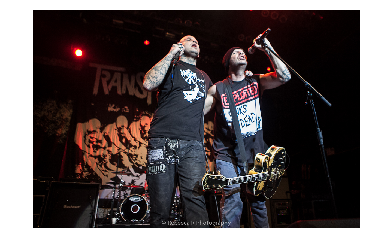

A: I played lead guitar for this band a few years ago.
B: Do you know the name of the band shown here?
A: I am not sure who they are now.  When I played for them, we used the name Professor McStuffins.
B: That's a pretty great name.
A: Thank you, I actually came up with it myself! Do you like rock music?
B: I am very new to rock as a genre. Yes I do.


In [8]:
show_dial(igc, igc_img_path, 20)

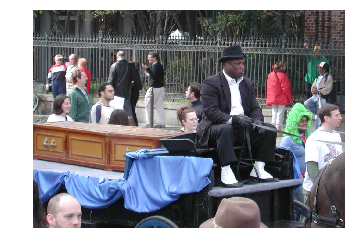

A: I want my coffin to be moved like this!
B: You wouldn't mind holding up traffic for miles?
A: No, because it will be that important when I die!
B: Are you going to have an enormous headstone on your grave also?
A: Yes, naturally.
B: Well it's the last thing you'll do so I guess you should make it count!


In [9]:
show_dial(igc, igc_img_path, 200)